# [`ultralytics_api`](../vancouver_watching/ai/classes.py) Inference Sandbox

model: https://hub.ultralytics.com/models/R6nMlK6kQjSsQ76MPqQM?tab=preview

In [1]:
from bluer_sandbox import notebooks

import os
from IPython.display import Image
import matplotlib.pyplot as plt 

from bluer_options import string
from bluer_objects import file
from bluer_objects import objects, storage

from vancouver_watching.host import signature
from vancouver_watching.ai.ultralytics import Ultralytics_API
from vancouver_watching.logger import logger

logger.info(f"{'.'.join(signature())},\nbuilt on {string.pretty_date()}")

🌈  vancouver_watching-4.9.1.bluer_ai-12.136.1.bluer_objects-6.96.1.bluer_options-5.86.1.torch-2.2.2.Python 3.12.9.Darwin 23.6.0..Jupyter-Notebook,
built on 23 April 2025, 16:03:31


In [2]:
object_name = "vanwatch-test-object-v2"
filename = "Victoria41East.jpg"

object_path = objects.object_path(object_name)

In [3]:
assert storage.download(object_name, filename)

🌀  bluer_objects.host.functions.shell(unzip -o "/Users/kamangir/storage/abcli/vanwatch-test-object-v2.zip" -d "/Users/kamangir/storage/abcli/vanwatch-test-object-v2")
🌀  WebDAVzipInterface.download vanwatch-test-object-v2


Archive:  /Users/kamangir/storage/abcli/vanwatch-test-object-v2.zip
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/test.gif  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/vancouver-902p0k0ntw06ba7l.geojson  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/clark1east.jpg  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/vancouver.json  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/vancouver-0qz1cm2tculuxgoc.json  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/Victoria41East.jpg  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/vancouver-5492l1cgubarck2m.json  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/vancouver-aeyj8aqc8avqfa9a.geojson  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/vancouver.geojson  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/vanwatch-test-object-v2  
  inflat

---

In [4]:
# https://hub.ultralytics.com/models/<model-id>?tab=preview

model_id = "R6nMlK6kQjSsQ76MPqQM" # default, YOLOv8x (heaviest)

# model_id = "1xKPEuwRoyDdwL6uamBI" # YOLOv8n (lightest)

In [5]:
ultralytics_api = Ultralytics_API(model_id=model_id)

🌈  Ultralytics_API.url: https://api.ultralytics.com/v1/predict/R6nMlK6kQjSsQ76MPqQM


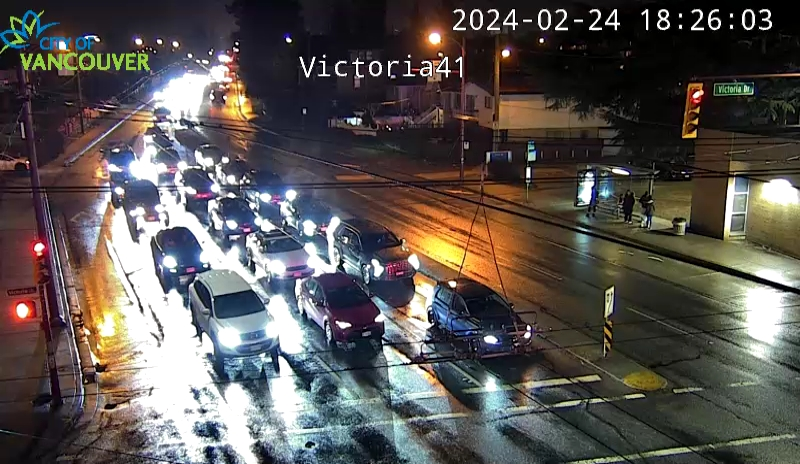

In [6]:
image_filename = os.path.join(object_path, filename)
Image(image_filename)

In [7]:
success, response_dict = ultralytics_api.infer(image_filename)
assert success
# response_dict

🌈  Ultralytics_API.infer(/Users/kamangir/storage/abcli/vanwatch-test-object-v2/Victoria41East.jpg)
🌈  car: 12, person: 3, traffic light: 2
🌀  bluer_objects.file.save.save_image: 574x800x3:uint8 -> /Users/kamangir/storage/abcli/vanwatch-test-object-v2/Victoria41East-inference.jpg


(-0.5, 799.5, 529.5, -0.5)

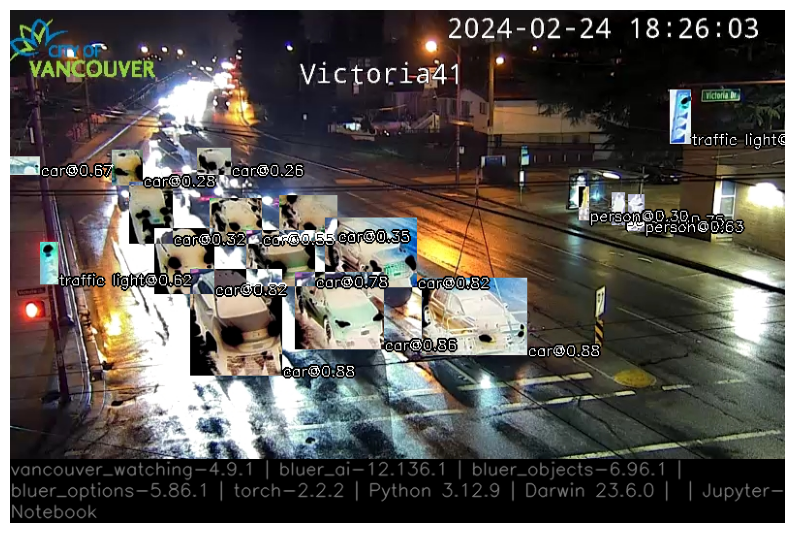

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(ultralytics_api.render(
    file.load_image(image_filename)[1].copy(),
    response_dict
))
plt.axis("off")

---

In [9]:
assert storage.upload(object_name)

🌀  bluer_objects.host.functions.shell(zip -r "../vanwatch-test-object-v2.zip" ".")


updating: test.gif (deflated 2%)
updating: vancouver-902p0k0ntw06ba7l.geojson (deflated 90%)
updating: clark1east.jpg (deflated 0%)
updating: vancouver.json (deflated 94%)
updating: vancouver-0qz1cm2tculuxgoc.json (deflated 94%)
updating: Victoria41East.jpg (deflated 1%)
updating: vancouver-5492l1cgubarck2m.json (deflated 94%)
updating: vancouver-aeyj8aqc8avqfa9a.geojson (deflated 90%)
updating: vancouver.geojson (deflated 90%)
updating: vanwatch-test-object-v2 (deflated 27%)
updating: 2024-02-24-18-28-19-32939 (deflated 45%)
updating: Victoria41East-61x9wqk5s4d2sp2w.jpg (deflated 0%)
updating: vancouver-khemf04gn6it82aq.geojson (deflated 90%)
updating: Victoria41East-inference.jpg (deflated 1%)
updating: clark1east-inference.jpg (deflated 0%)


🌀  WebDAVzipInterface.upload vanwatch-test-object-v2


In [10]:
# END